<a href="https://colab.research.google.com/github/ElyorS/AI-application-system/blob/main/12204556_AI_week11_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
# Save datagenerators as file to colab working directory
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get (url)
# make sure vour filename is the same as how you want to import
with open( 'utilities.py','w') as f:
    f.write(r.text)

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from utilities import train_model
device = torch. device("cuda:O" if torch.cuda. is_available() else "cpu")
EPOCHS = 100
BATCH_SIZE = 16

TRAIN_TEST_SPLIT = 0.8
MIN= 12
FILE_NAME = '/content/book_store_sales.csv'
def readfile(file_name) :
    file = open(file_name, 'r', encoding='utf-8')
    next (file)
    data = []
    for line in (file):
        values = line.split(',')
        data.append(float (values [1]))
    file.close()
    return np.array(data, dtype=np.float32)

# Read data and split up into train and test data.
sales = readfile(FILE_NAME)
months = len(sales)
split = int (months * TRAIN_TEST_SPLIT)
train_sales = sales[0:split]
test_sales = sales [split:]

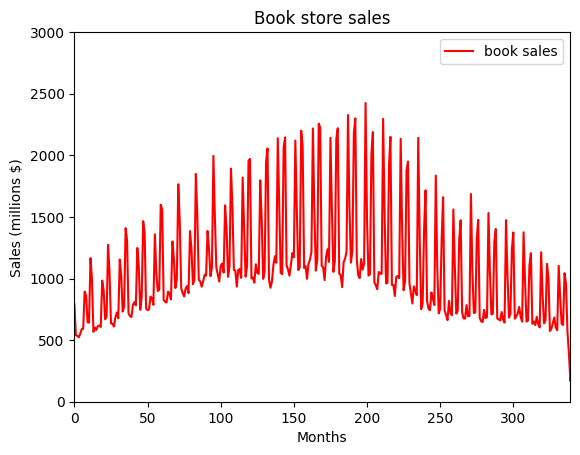

In [13]:
# Plot dataset
x = range(len(sales))
plt.plot(x, sales, 'r-', label='book sales')
plt.title('Book store sales')
plt.axis([0, 339, 0.0, 3000.01])
plt.xlabel('Months')
plt.ylabel('Sales (millions $)')
plt. legend()
plt.show()

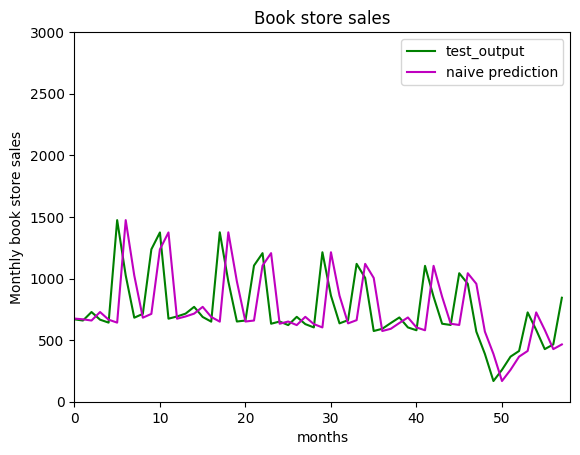

In [17]:
# Plot naive prediction
test_output = test_sales [MIN:]
naive_prediction = test_sales [MIN-1: -1]
x = range(len (test_output))
plt.plot(x, test_output, 'g-', label='test_output')
plt.plot(x, naive_prediction, 'm-', label='naive prediction')
plt.title ('Book store sales')
plt.axis([0, len(test_output), 0.0, 3000.0])
plt.xlabel ('months')
plt.ylabel('Monthly book store sales')
plt.legend()
plt.show()

In [18]:
# Standardize train and test data.
# Use only training seasons to compute mean and stddev.
mean = np.mean(train_sales)
stddev = np. std(train_sales)
train_sales_std = (train_sales - mean)/stddev
test_sales_std = (test_sales - mean)/stddev

In [20]:
# Create train examples.
train_months = len(train_sales)
train_X = np.zeros ((train_months-MIN, train_months-1, 1), dtype=np. float32)
train_y = np.zeros((train_months-MIN, 1), dtype=np. float32)
for i in range(0, train_months-MIN):
   train_X[i, -(i+MIN) : , 0] = train_sales_std[0: i+MIN]
   train_y[i, 0] = train_sales_std[i+MIN]
# Create test examples.
test_months = len(test_sales)
test_X = np.zeros ((test_months-MIN, test_months-1, 1), dtype=np. float32)
test_y = np. zeros ((test_months-MIN, 1), dtype=np. float32)
for i in range(0, test_months-MIN):
   test_X[i, -(i+MIN): , 0] = test_sales_std[0: i+MIN]
   test_y[i, 0] = test_sales_std[i+MIN]
# Create Dataset objects.
trainset = TensorDataset (torch. from_numpy (train_X).clone (), torch. from_numpy(train_y))
testset = TensorDataset(torch. from_numpy(test_X) .clone(), torch. from_numpy (test_y))

In [21]:
# Custom laver that retrieves only last time step from RNN output.
class LastTimestep(nn. Module):
    def forward(self, inputs):
        return inputs [1] [0]
# Create BNN mode|
model = nn. Sequential(
   nn. RNN(1, 128, nonlinearity='relu', batch_first=True),
    LastTimestep(),
    nn. Linear (128, 1)
)

# Loss function and optimizer.
optimizer = torch. optim. Adam(model.parameters())
loss_function = nn. MSELoss()
# Train model.
train_model (model, device, EPOCHS, BATCH_SIZE, trainset, testset,
            optimizer, loss_function,'mae')

Epoch 1/100 loss: 0.9505 - mae: 0.7228 - val_loss: 1.1312 - val_mae: 0.8276
Epoch 2/100 loss: 0.8399 - mae: 0.6627 - val_loss: 0.9005 - val_mae: 0.7470
Epoch 3/100 loss: 0.6632 - mae: 0.6007 - val_loss: 0.4817 - val_mae: 0.5115
Epoch 4/100 loss: 0.5495 - mae: 0.5551 - val_loss: 0.5575 - val_mae: 0.5777
Epoch 5/100 loss: 0.4483 - mae: 0.5005 - val_loss: 0.2814 - val_mae: 0.3600
Epoch 6/100 loss: 0.4757 - mae: 0.5113 - val_loss: 0.3980 - val_mae: 0.4449
Epoch 7/100 loss: 0.4359 - mae: 0.4734 - val_loss: 0.3364 - val_mae: 0.3801
Epoch 8/100 loss: 0.3859 - mae: 0.4459 - val_loss: 0.3278 - val_mae: 0.3386
Epoch 9/100 loss: 0.3339 - mae: 0.4340 - val_loss: 0.8325 - val_mae: 0.6353
Epoch 10/100 loss: 1.0271 - mae: 0.7499 - val_loss: 0.3848 - val_mae: 0.5035
Epoch 11/100 loss: 0.6649 - mae: 0.5226 - val_loss: 0.3457 - val_mae: 0.4628
Epoch 12/100 loss: 0.4946 - mae: 0.4827 - val_loss: 0.3529 - val_mae: 0.3872
Epoch 13/100 loss: 0.4247 - mae: 0.4717 - val_loss: 0.2284 - val_mae: 0.3005
Epoch 14

[0.08738877032609547, 0.13716481439769268]

In [22]:
# Create naive prediction based on standardized data.
test_output = test_sales_std[MIN:]
naive_prediction = test_sales_std [MIN-1:-1]
mean_squared_error = np.mean(np. square(naive_prediction
- test_output))
mean_abs_error = np.mean(np.abs(naive_prediction - test_output))
print ('naive test mse: ',mean_squared_error)
print('naive test mean abs: ', mean_abs_error)


naive test mse:  0.4723033
naive test mean abs:  0.48052385


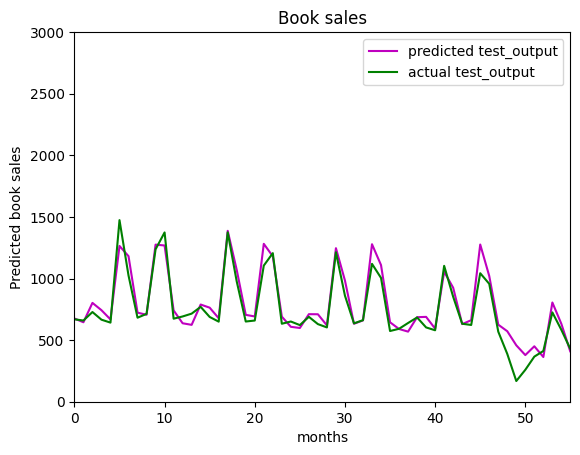

In [24]:
# Use trained model to predict the test data
inputs = torch.from_numpy(test_X)
inputs = inputs.to(device)
outputs = model(inputs)
predicted_test = outputs.cpu().detach().numpy()
# De-standardize output.
predicted_test = np. reshape (predicted_test,
(len (predicted_test)))
predicted_test = predicted_test * stddev + mean
# Plot test prediction.
x = range(len(test_sales)-MIN)
plt.plot(x, predicted_test, 'm-', label='predicted test_output')
plt.plot(x, test_sales[-(len(test_sales)-MIN):], 'g-', label= 'actual test_output')
plt.title('Book sales')
plt.axis([0, 55, 0.0, 3000.0])
plt.xlabel ('months')
plt.ylabel('Predicted book sales')
plt.legend()
plt.show()